In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os

from scipy import optimize, stats

In [2]:
plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]
# plt.rc("text", usetex=True)
plt.rc("font", size=18)


COLORS = ["f07167","219ebc","c767ac","ffba0a","59a270"]
COLORS = ['#' + c if c[0] != '#' else c for c in COLORS ]

from cycler import cycler

# Update the default prop_cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=COLORS)

# Load tables

In [3]:
DIR = '/scratch/midway3/dhayaa/SHEARTESTS/DR3_Masked/'

23.854441799944237
0.24880830225557993


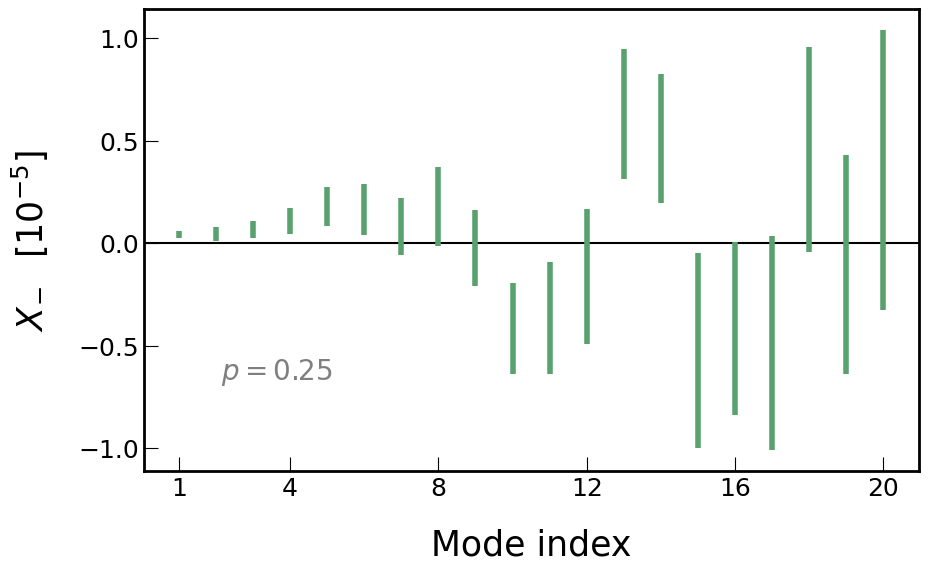

In [4]:
plt.figure(figsize = (10,6))

plt.axhline(0, color ='k')

B   = np.load(DIR + '/MRBmode_B.npy')
Cov = np.load(DIR + '/MRBmode_B_Cov.npy')

res = B
inv = np.linalg.inv(Cov) * ((100 - 20 - 2) / (100 -  1))
chi2 = res @ inv @ res
p = 1 - stats.chi2(df = len(res)).cdf(chi2)
print(chi2)
print(1 - stats.chi2(df = len(res)).cdf(chi2))

plt.errorbar(np.arange(20) + 1 , B * 1e5, yerr = np.sqrt(np.diagonal(Cov))  * 1e5, fmt = '.', markersize = 0, lw = 4, color = COLORS[4])

plt.xticks([1, 4, 8, 12, 16, 20], [1, 4,8, 12, 16, 20])
plt.ylabel(r'$X_{\!-}$  [$10^{-5}$]', size = 25, labelpad = 20)
plt.xlabel('Mode index', size = 25, labelpad = 20)

plt.text(0.1, 0.2, '$p = %0.2f$' % (p), size = 20, alpha = 0.5, transform = plt.gca().transAxes)

plt.savefig('./Bmode.pdf', dpi = 300, bbox_inches = 'tight')